## I. Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/롸/Desktop/DailyDelhiClimateTrain.csv', index_col='date', parse_dates=True)

In [33]:
df_test = pd.read_csv('/Users/롸/Desktop/DailyDelhiClimateTest.csv', index_col='date', parse_dates=True)

In [3]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [88]:
#mean temp starting from 2017-01-01 to 2017-04-24
df_test.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [4]:
#freq = None, so let's make it 'D' (day)
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)

In [5]:
#now freq='D'
df = df.asfreq('D')
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq='D')

In [6]:
#overall, 1462 non-null 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Freq: D
Data columns (total 4 columns):
meantemp        1462 non-null float64
humidity        1462 non-null float64
wind_speed      1462 non-null float64
meanpressure    1462 non-null float64
dtypes: float64(4)
memory usage: 57.1 KB


In [7]:
#checking missing values
df.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

## II. EDA
- Mean temperature and humidity has seasonality. Mean temperature reaches peak at around June - August and declines afterwards. This pattern seem to be repeated over the following years.
- Humidity hit the lowest point before July and steadily increases afterwards. Like mean temperature, this pattern seems to be repeated for the following years. 
- Wind speed increases from Jan to July, and has a peak value in August. It then decreases steadily. 
- Mean pressure seems to have no pattern. Values are somewhat constant and is not appropriate for time-series analysis. 

#### Mean Temperature

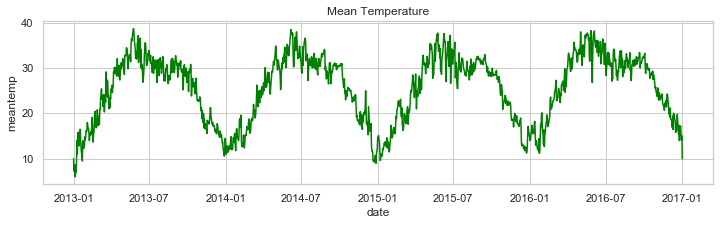

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,3))
a = sns.lineplot(data=df, x=df.index, y='meantemp', color='green').set_title("Mean Temperature")

#### Findings
> Mean temperature has seasonality. It reaches the peak at around June to August, and declines afterwards. This pattern seems to be repeated over the following years.

#### Humidity

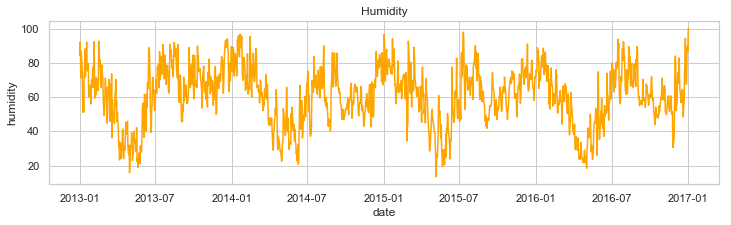

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,3))
b = sns.lineplot(data=df, x=df.index, y='humidity', color='orange').set_title("Humidity")

#### Findings
> Humidity hit the lowest point before July and steadily increases afterwards. Like mean temperature, this pattern seems to be repeated for the following years.

#### Wind Speed

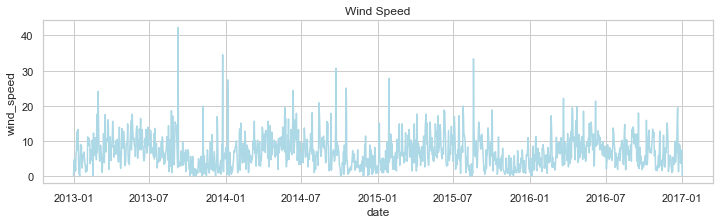

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,3))
c = sns.lineplot(data=df, x=df.index, y='wind_speed', color='lightblue').set_title("Wind Speed")

#### Findings
> Wind speed increases from Jan to July, and has a peak value in August. It then decreases steadily.

#### Mean Pressure

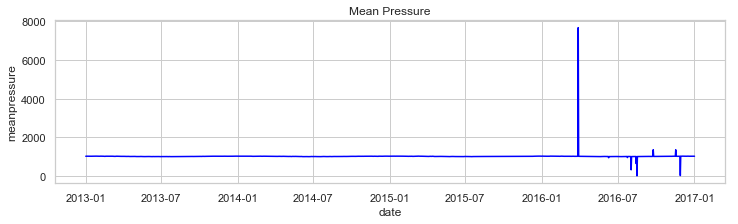

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,3))
c = sns.lineplot(data=df, x=df.index, y='meanpressure', color='blue').set_title("Mean Pressure")

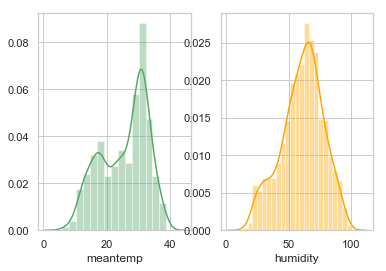

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

e = sns.distplot(df['meantemp'], color='g',  ax=ax1)
f = sns.distplot(df['humidity'], color='orange', ax=ax2)

## III. Checking if time-series data is stationary
- ADF test tells us that it is not stationary.

In [13]:
#use Augmented Dickey-Fuller test to check stationary
from statsmodels.tsa.stattools import adfuller
def test_adfuller(df):
    result = adfuller(df)
    labels = ['adf value', 'p-value', '# lags', '# observation']
    out = pd.Series(result[:4], index=labels)
    
    for key,val in result[4].items():
        out['critical '+key]=val
    
    print(out)
    
    if(result[1] <= 0.05):
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Fail to regect the null hypothesis. Data is non-stationary")

In [14]:
test_adfuller(df['meantemp'])

adf value          -2.021069
p-value             0.277412
# lags             10.000000
# observation    1451.000000
critical 1%        -3.434865
critical 5%        -2.863534
critical 10%       -2.567832
dtype: float64
Fail to regect the null hypothesis. Data is non-stationary


#### Breakdown 'meantemp' to seasonal, trend, residual components

In [17]:
#resample based on 'MS' (start of the month) to see the decompositions clearly
df_monthly = df['meantemp'].resample('MS').mean()
df_monthly.head()

date
2013-01-01    12.074770
2013-02-01    16.867560
2013-03-01    22.814209
2013-04-01    28.895119
2013-05-01    33.776767
Freq: MS, Name: meantemp, dtype: float64

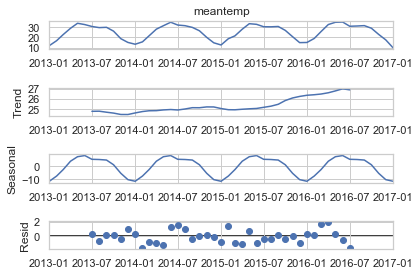

In [18]:
#seasonal_decompose: function that breaksdown to trend, seasonal, residual etc
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df_monthly, period=12)
decomp.plot()
plt.show()

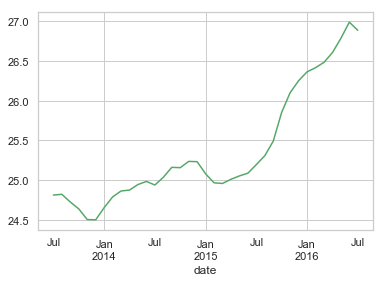

In [69]:
# trend of mean temperature, increasing mean temp. 
f = decomp.trend
f.plot(color='g')
plt.show()

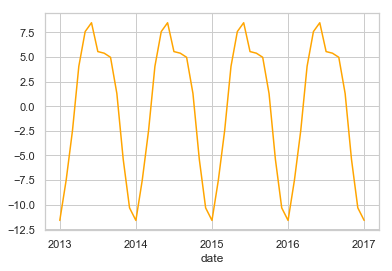

In [71]:
# seasonal feature of mean temperature
g = decomp.seasonal
g.plot(color='orange')
plt.show()

#### Findings
> Mean temperature has seasonal trend

### Plot ACF and PACF
- ACF (autocorrelation plot) describes how well the present value of the series is related with its past values. 
- A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.


- PACF (partial autocorrelation plot) finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value. So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. Remember while modeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. Hence we need to retain only the relevant features.


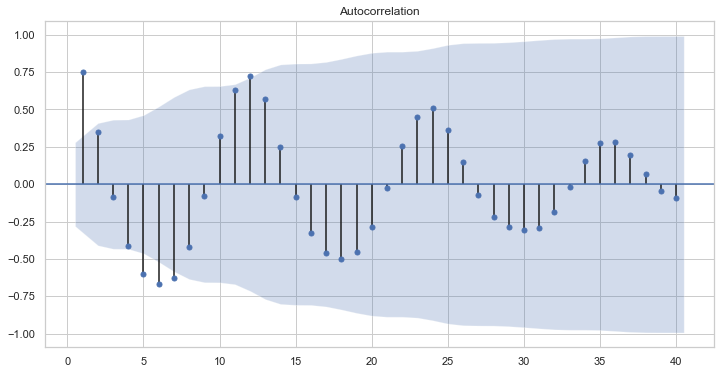

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(12,6))
plot_acf(df_monthly, lags=40, zero=False, ax=ax)
plt.show()

## Model Selection
- It has a seasonal trend & data is non-stationary, so SARIMA model (Seasonality + ARIMA) is selected. 
- auto_arima function to figure out the optimized order for the model
- fit df['meantemp'] or fit[df_monthly]??

In [32]:
#Result: SARIMAX(2, 0, 1)x(2, 1, 0, 12) with AIC value of 5844.614 is selected. 
from pmdarima.arima import auto_arima

model = auto_arima(df['meantemp'],
                      seasonal=True, m=12,
                      d=0, D=1, 
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=19.04 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=7602.228, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6050.279, Time=1.51 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=6812.803, Time=1.32 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=7600.543, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=6388.743, Time=0.20 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=5919.939, Time=3.70 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=21.44 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.47 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=7574.279, Time=1.93 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=5906.552, Time=5.04 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=6044.816, Time=2.11 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=22.27 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=8.68 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AI

In [89]:
train = df.loc[:, :'meantemp']
test = df_test.loc[:, :'meantemp']
print(train.shape, test.shape)

(1462, 1) (114, 1)


In [90]:
train.head(3)

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667


In [91]:
test.head(3)

,meantemp
date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111


In [116]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model= SARIMAX(test, order=(2,0,1), seasonal_order=(2,1,0,12))
results=model.fit()
print(results.summary())

/Users/롸/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/롸/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/롸/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/롸/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                  114
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 12)   Log Likelihood                -215.029
Date:                             Thu, 05 Nov 2020   AIC                            442.059
Time:                                     14:29:19   BIC                            457.809
Sample:                                 01-01-2017   HQIC                           448.437
                                      - 04-24-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4050      0.770      0.526      0.599      -1.104       1.914
ar.L2          0.5125      

## Model Assessment
#### Diagnostics
- Standardized residuals : No obvious trend
- Histogram plus kde estimate: The KDE curve should be very similar to the normal distribution
- Normal QQ: Most of the data points should lie on the straight line
- Correlogram: 95% of correlations for lag greater than one should not be significant

??? is there no obvious trend in std.residual? 
??? how to look at correlogram??? what is this

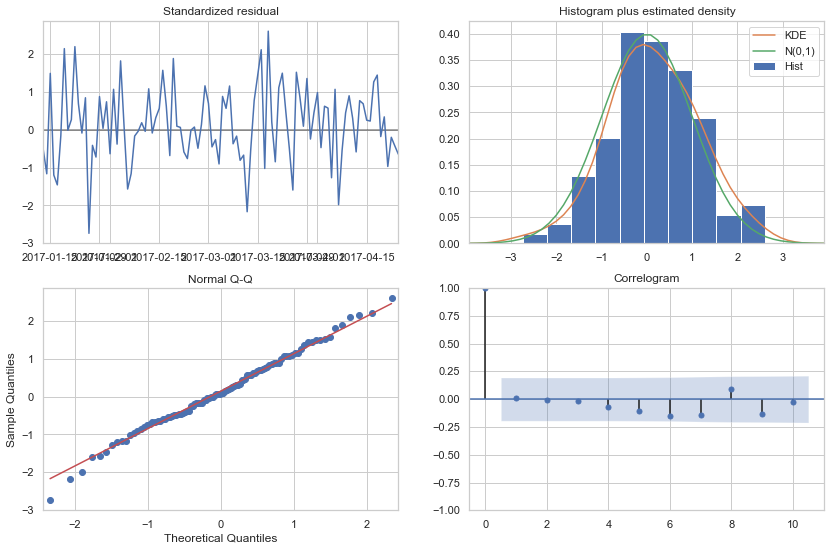

In [117]:
results.plot_diagnostics(figsize=(14,9))
plt.show()

#### Conclusion
> Normal QQ looks good as the blue line follows the 45 degree line. Also histogram plus estimated density looks good, since the distribution is almost normal. In the correlogram, lags that are greater than 1 does not significant.

### Comparing with the test data

In [118]:
forecast = results.predict()

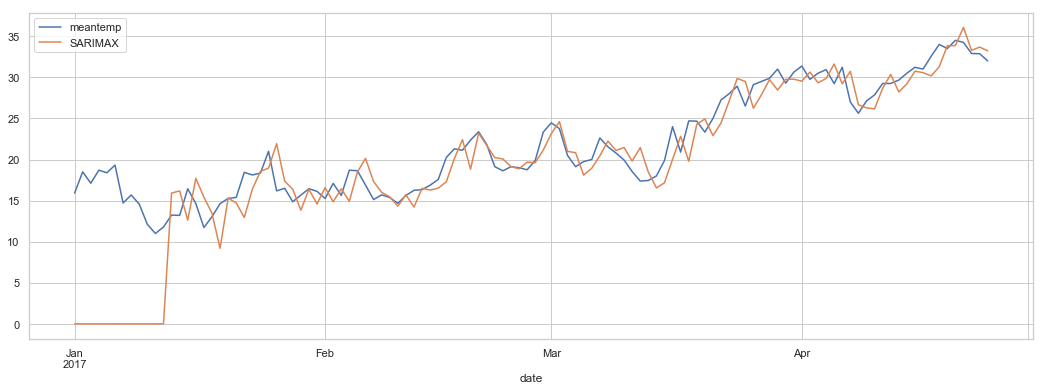

In [119]:
#blue line is the test dataset vs. orange line is the forecasted data based on SARIMA model
test.plot(legend=True,figsize=(18,6))
forecast.plot(label='SARIMAX',legend=True)
plt.show()